<h2>Open data and import libraries</h2>

In [103]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

df1 = pd.read_csv("steps.csv", delimiter=";")
print(df1)

df2 = pd.read_csv("survey.csv")
print(df2)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929        NaN     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  4-5-2014  5-5-2014  

<h2>Merge datasets:</h2>

In [104]:
df = pd.merge(df2, df1, on = "id")

# Check minimum and maximum height and weight by using describe() and by sorting.
# print(df["height"].describe())
# print(df.sort_values(by="height", ascending=True))

# Replace all NANs with a zero to eliminate empty values.
df = df.fillna(0)

# Remove weights that are below 35kg and above 156kg.
df = df[(df["weight"] < 156) & (df["weight"] > 35)]
print(df)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

<h2>Find out the mean steps per participant:</h2>

In [105]:
# Select the first date row in the dataframe, use axis=1 in .mean() to calculate the mean steps of each user over all measured days.
meanStepsPerParticipant = df.loc[:,"20-6-2013":].mean(axis=1).round()
df["Mean_steps_per_participant"] = meanStepsPerParticipant

# Show the mean steps as the first column in the dataframe.
first_column = df.pop("Mean_steps_per_participant")
df.insert(0, "Mean_steps_per_participant", first_column)

# print(meanStepsPerParticipant)

# Show the first five.
# print(df)
df.head()


,Mean_steps_per_participant,id,city,gender,age,hh_size,education,education_1,height,weight,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,5134.0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2826.0,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3746.0,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,222.0,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,875.0,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Visualize the mean steps in a distplot:</h2>

c:\Users\jvanw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


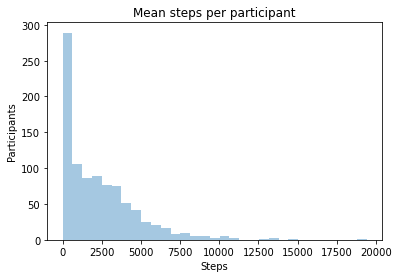

In [106]:
sns.distplot(meanStepsPerParticipant, kde=False)
plt.title("Mean steps per participant")
plt.xlabel("Steps")
plt.ylabel("Participants")
plt.show()

<h2>Central tendency and variation:</h2>

The mean steps are: 2347.45670995671 steps
The median steps are: 1660.0 steps
The standard deviation steps are: 2412.5676405896565 steps


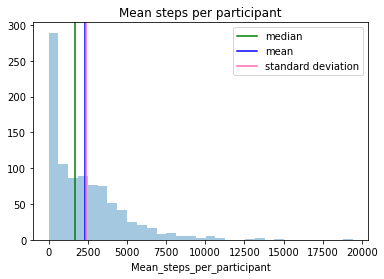

In [107]:
mean_steps = df["Mean_steps_per_participant"].mean()
median_steps = df["Mean_steps_per_participant"].median()
standardDeviation = np.std(df["Mean_steps_per_participant"])

print(f'The mean steps are: {mean_steps} steps')
print(f'The median steps are: {median_steps} steps')
print(f'The standard deviation steps are: {standardDeviation} steps')

sns.distplot(df["Mean_steps_per_participant"], kde=False)
plt.title("Mean steps per participant")
plt.axvline(median_steps, 0, 100, color='green', label='median')
plt.axvline(mean_steps, 0, 100, color='blue', label='mean')
plt.axvline(standardDeviation, 0, 100, color='hotpink', label='standard deviation')
plt.legend()
plt.show()

Description about the plot above:
- Normality: the normality is normal, all steps are well above 0 and sometimes even above 10.000.
- Variation: variation is present. Most steps are below 1000, a reasonable amount of the steps are between 1000 and 5000. A small amount of steps are above 5000.
- Modality: there is one peak and five smaller peaks.
- Skewness: a positive skew is present.
- Outliers: a few outliners are present above the 12.500 steps. 

<h2>Relation of the mean steps with two other categorical variables:</h2>

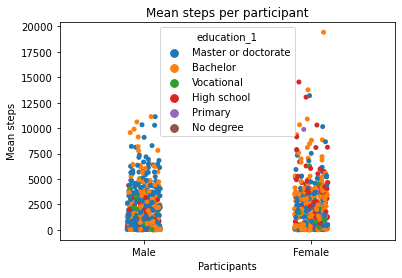

In [108]:
sns.stripplot(y="Mean_steps_per_participant", x="gender", hue="education_1", data=df)
plt.title('Mean steps per participant')
plt.ylabel('Mean steps')
plt.xlabel('Participants')
plt.show()

Description about the plot above:
- The amount of "Master or doctorate" education for males stand out. For females the amount of "Bachelor" stand out, although there is still a reasonable amount of "Master or doctorate" present.
- Male peaks are dominated by "Bachelor" and "Master or doctorate" education. Female peaks are dominated by "Bachelor" and "High school".

The educational level of females and males are roughly the same, although the amount of high school degrees are more present for females. Males with a high school degree tend to perform worser than males with higher educational levels. Females with a high school degree perform overall good and bad.

<h2>Assignment week 2, make a better prediction of the model by calculating the BMI:</h2>

In [109]:
participantWeight = df["weight"]
df["height"] = df["height"] / 100
participantHeight = df["height"]

df["BMI"] = participantWeight / (participantHeight * participantHeight)
# df["BMI"].describe()

# Remove infinite BMI
df = df[df["BMI"] < 60]

print(df["BMI"])

0      30.930438
1      23.765432
2      25.617284
3      25.249337
4      21.872423
         ...    
924    21.671258
925    24.414062
926    21.672110
927    21.971336
928    23.456790
Name: BMI, Length: 922, dtype: float64


<h2>Make a scatterplot of the numerical variables:</h2>

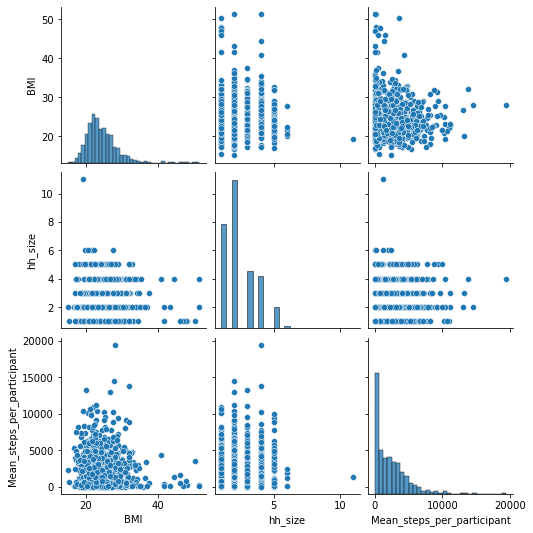

In [110]:
subsetColumns = df[["BMI", "hh_size", "Mean_steps_per_participant"]]
sns.pairplot(subsetColumns)
plt.show()

Description about the plots above:
- BMI has a correlation with hh-size and mean steps. Multiple outliers are present.
- Hh-size also has a correlation with BMI and mean steps. One outlier is present.
- Mean steps also has a correlation with BMI and hh-size. Multiple outliers are present.

<h2>Correlation of the numerical variables:</h2>

In [111]:
corr = df[["BMI", "hh_size", "Mean_steps_per_participant"]].corr()
corr

,BMI,hh_size,Mean_steps_per_participant
BMI,1.000000,0.031850,-0.054818
hh_size,0.031850,1.000000,0.038256
Mean_steps_per_participant,-0.054818,0.038256,1.000000


This above significance makes the following clear:
- There is a weak significance between BMI and hh-size.
- There is a moderate significance between BMI and mean steps.
- There is a weak significance between hh-size and mean steps.

<h2>Make a heatmap, because it looks cool (I mean, it makes the visualisation of the correlation clearly visible):</h2>

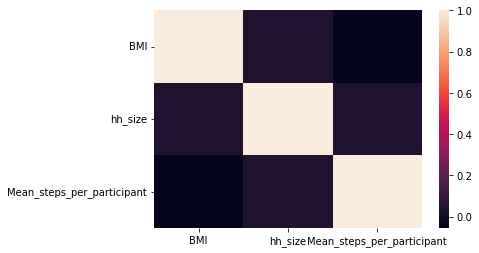

In [112]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

The above significance is like a diagonal mirror. It has the same significances as described in the above description (because it is the same dataframe).

<h2>Make a kdeplot about the relation between the mean steps, BMI, and hh_size:</h2>

c:\Users\jvanw\anaconda3\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Mean_steps_per_participant', ylabel='BMI'>

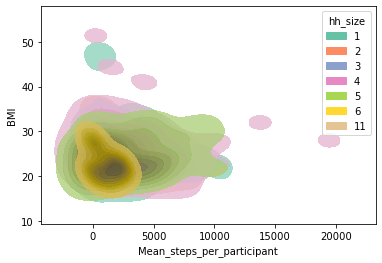

In [113]:
# sns.kdeplot(data=df, x="BMI", y="Mean_steps_per_participant", multiple="stack")

sns.kdeplot(
    data=df, x="Mean_steps_per_participant", y="BMI", hue="hh_size",  fill=True, common_norm=False, palette="Set2", alpha=.75
)

What makes clear from the above?
- A lot of participants with a hh-size of 6 has made low steps.
- Many participants with a hh-size of 4 and 5 made at least 10.000 steps. There are some outliers with the hh-size of 4.
- There is one outlier of participants with a hh-size of 1 , they made few steps and have a high BMI.
- There is a decent amount of participants with a BMI above 30.

<h2>Week 3 homework</h2>

<h3>Description about linear regression in my own words</h3>
Linear regression creates a model that depicts the relationship between the dependent and independent variable.

Create dummy variables for the categorical variables:

In [114]:
# This was my first idea of creating dummy variables, selecting certain columns. However, I found out that this is not the ideal way.
# dfDummies = pd.get_dummies(df[["city", "gender", "education_1"]])

dfDummies = pd.get_dummies(df)
dfDummies

,Mean_steps_per_participant,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,...,age_45-54,age_55-64,age_65+,age_<25,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,5134.0,1,4,4,1.78,98.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2826.0,2,1,3,1.80,77.0,0.0,0.0,10473.0,705.0,...,0,0,0,0,1,0,0,0,0,0
2,3746.0,3,2,2,1.80,83.0,0.0,11428.0,12523.0,2553.0,...,0,0,0,0,0,0,1,0,0,0
3,222.0,4,1,1,1.78,80.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,875.0,5,3,4,1.67,61.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,1743.0,925,3,4,1.65,59.0,0.0,4571.0,10471.0,5899.0,...,1,0,0,0,0,0,1,0,0,0
925,732.0,926,3,5,1.92,90.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
926,6269.0,927,2,2,1.81,71.0,0.0,0.0,0.0,1623.0,...,0,0,0,0,1,0,0,0,0,0
927,3872.0,928,1,1,1.72,65.0,0.0,0.0,14411.0,14364.0,...,0,1,0,0,0,1,0,0,0,0


Make a linear regression model that predicts the mean steps per participant:

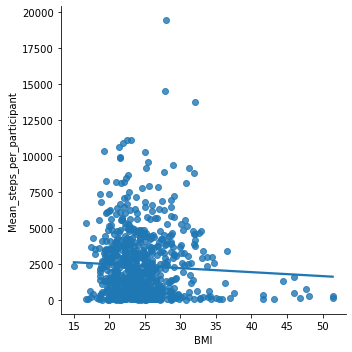

In [115]:
trainingData, testData = train_test_split(dfDummies, test_size=0.2)

sns.lmplot(x="BMI", y="Mean_steps_per_participant", data=trainingData, ci=False)
plt.xlabel("BMI")
plt.ylabel("Mean_steps_per_participant")
plt.show()

The above plot makes the following clear:
- Most part participant's BMI lie between 17 and 30.
- There are a few outliers above 115.000 steps.
- Most average steps lie around 2500 steps.

<h2>Evaluation</h2>

Predictive power of the model (R2, RMSE)

In [116]:
# Independent variable
# Note for myself: Bereken mean steps (y) aan de hand van BMI en anderen (x)
x = testData[["BMI", "education_1_Bachelor", "education_1_High school", "education_1_Master or doctorate", "education_1_No degree", "education_1_Primary", "education_1_Vocational", "city_Bordeaux", "city_Lille", "city_Lyon", "city_Montpellier", "gender_Female", "gender_Male"]]

# Dependent variable
y = testData["Mean_steps_per_participant"]

# Create a model where the slope and interfall will be calculated
lm = LinearRegression()
lm.fit(x, y)

testData["Steps_predict"] = lm.predict(x)
testData

# Use this to show all columns
# testData.head()

,Mean_steps_per_participant,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,...,age_55-64,age_65+,age_<25,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,Steps_predict
327,191.0,328,1,1,1.81,72.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,2421.984466
38,3483.0,39,1,2,1.95,90.0,0.0,10375.0,10097.0,9027.0,...,0,0,0,0,0,1,0,0,0,2355.568557
586,674.0,587,2,5,1.85,88.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,1324.429922
325,1638.0,326,3,4,1.71,86.0,0.0,11187.0,9072.0,7615.0,...,0,0,0,1,0,0,0,0,0,1512.449733
779,4360.0,780,3,4,1.75,71.0,0.0,11891.0,12523.0,6194.0,...,1,0,0,0,0,1,0,0,0,2041.352726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,87.0,437,5,4,1.75,88.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,2156.627484
297,84.0,298,6,4,1.69,79.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,3072.010804
64,1905.0,65,6,4,1.58,54.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,3109.014550
208,906.0,209,2,2,1.76,74.0,0.0,0.0,0.0,12061.0,...,0,0,0,0,0,1,0,0,0,1860.606487


In [117]:
r2_score(testData["Mean_steps_per_participant"], testData["Steps_predict"])

0.0599168865999834

In [118]:
import math

math.sqrt(mean_squared_error(testData["Mean_steps_per_participant"], testData["Steps_predict"]))

2415.597043400904

Calculate the residual:

In [119]:
testData["residual"] = testData["Mean_steps_per_participant"] - testData["Steps_predict"]
testData["residual"].describe()

count    1.850000e+02
mean    -2.458094e-15
std      2.422152e+03
min     -3.287111e+03
25%     -1.588428e+03
50%     -7.764535e+02
75%      9.205493e+02
max      1.035858e+04
Name: residual, dtype: float64

<AxesSubplot:xlabel='BMI', ylabel='residual'>

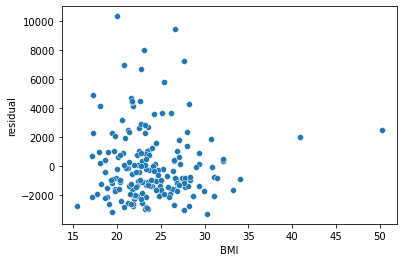

In [120]:
sns.scatterplot(data = testData, x = "BMI", y = "residual")

<h2>Conclusion</h2>
Based on the R^2 calculation above, we can predict 4.4% of the variation in the mean steps per participant based on their BMI. My prediction is off by 2218.71 steps. This is a big inaccuracy, which can be described by the big amount of zero's in the created dummy values. Therefore, my created model is not accurate. I therefore thought I needed to type .dropna() instead of .fillna(0) right at the beginning of this file, but that will clear the whole dataframe unfortunately.